# Momentum MOM
Momentum (MOM) is an important measure of speed and magnitude of price moves. 
This is often a key indicator of trend/breakout-base trading algorithms. 
Momentum is simply the difference between the current price and price of some  
fixed periods in the past. Consecutive periods of positive momentum values  
indicate an uptrend, conversely if momentum is consecutively negative,  
that indicates a downtrend. Often we use simple/exponential moving averages  
of the MOM indicator.  

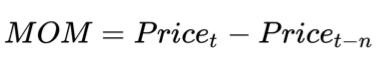  
Price *t* = price at time *t*  
Price *t-n* = price *n* time periods before time *t*

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [4]:
df = pd.read_csv('data/LUNAUSDT.csv')
close = df['Close']

In [7]:
# how far to look back to find reference price to compute momentum
time_period = 20

# history of observed prices to use in momentum calculation
history = []

# track momentum values
mom_values = []

for close_price in close:
    history.append(close_price)
    if len(history) > time_period:
        del(history[0])
    
    mom = close_price - history[0]
    mom_values.append(mom)

In [9]:
df_data = df.assign(ClosePrice=pd.Series(close, index=df.index))
df_data = df_data.assign(MomentumFromPrice20TimePeriod=pd.Series(mom_values, index=df.index))

close_price = df_data['ClosePrice']
mom = df_data['MomentumFromPrice20TimePeriod']

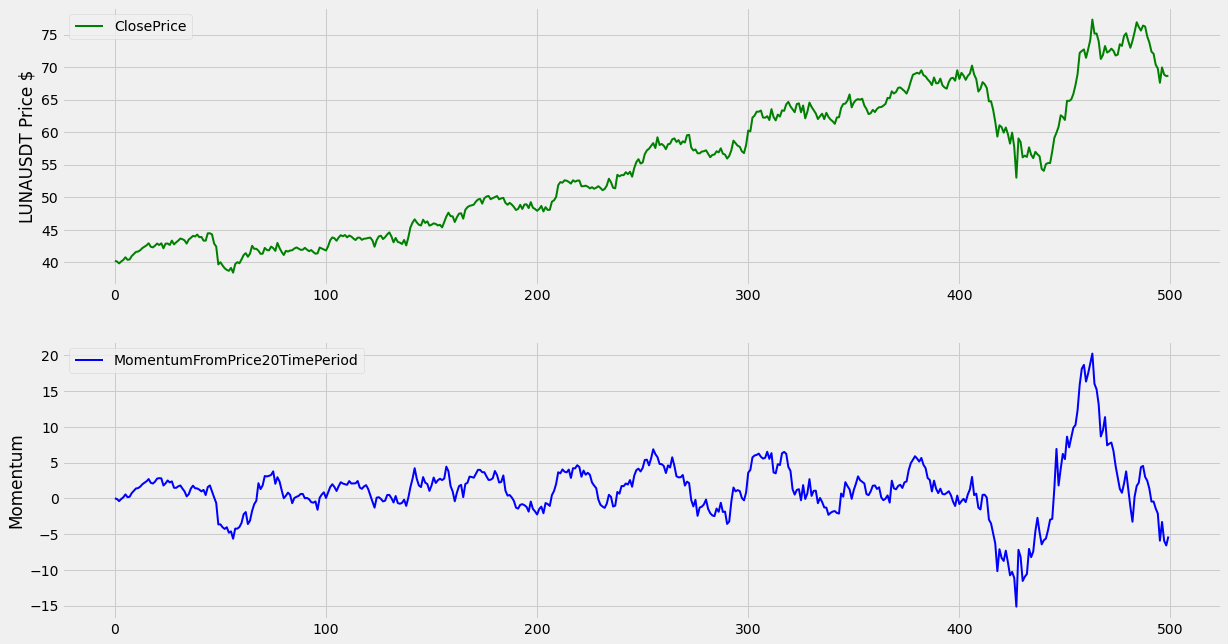

In [11]:
fig = plt.figure()
fig.set_size_inches(18.5, 10.5)

ax1 = fig.add_subplot(211, ylabel='LUNAUSDT Price $')
close_price.plot(ax=ax1, color='g', lw=2., legend=True)

ax2 = fig.add_subplot(212, ylabel='Momentum')
mom.plot(ax=ax2, color='b', lw=2., legend=True)

plt.show()